In [1]:
import os

# set the current working directory
curr_path = os.getcwd().split("/")[:-2]
curr_path = "/".join(curr_path)
os.chdir(curr_path)

In [2]:
import numpy as np
from pytspl import load_dataset

sc, coordinates, flow = load_dataset("lastfm-1k-artist")
flow = np.asarray(list(flow.values()))

Generating coordinates using spring layout.
Num. of nodes: 657
Num. of edges: 1997
Num. of triangles: 1276
Shape: (657, 1997, 1276)
Max Dimension: 2
Coordinates: 657
Flow: 1997


In [3]:
from pytspl.filters import SimplicialTrendFilter

trend_fil = SimplicialTrendFilter(simplicial_complex=sc)

print("Divergence:", trend_fil.get_divergence_flow(flow))
print("Curl:", trend_fil.get_curl_flow(flow))

(CVXPY) Jul 01 12:55:59 AM: Encountered unexpected exception importing solver ECOS:
ImportError("dlopen(/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so, 0x0002): tried: '/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (no such file), '/Users/irtaza.hashmi@futurice.com/Desktop/Thesis/sc-graph-library/thesis_venv/lib/python3.11/site-packages/_ecos.cpython-311-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))")
(CVXPY) Jul 01 12:55:59 AM: Encountered unexpected exception importing solver SCS:
ImportError("dlopen(/Users/irtaza

### Denoising

#### L2 regularizer

In [4]:

num_realizations = 50
snr_db = np.arange(-12, 12.5, 12)

trend_fil.denoising_l2_regularizer(flow=flow, component="divergence", 
                         num_realizations=num_realizations, snr_db=snr_db)

divergence_error_l2 = trend_fil.history["errors"]

SNR: 0.06309573444801933 dB - error noisy: 0.11852689428714633 - l2 error: 0.3054107990782995 - corr: 0.9554931483095994
SNR: 1.0 dB - error noisy: 0.011157172773536325 - l2 error: 0.019274562348268815 - corr: 0.9998104922255804
SNR: 15.848931924611133 dB - error noisy: 0.001409525304729235 - l2 error: 0.0029737737210004506 - corr: 0.9999954879054116


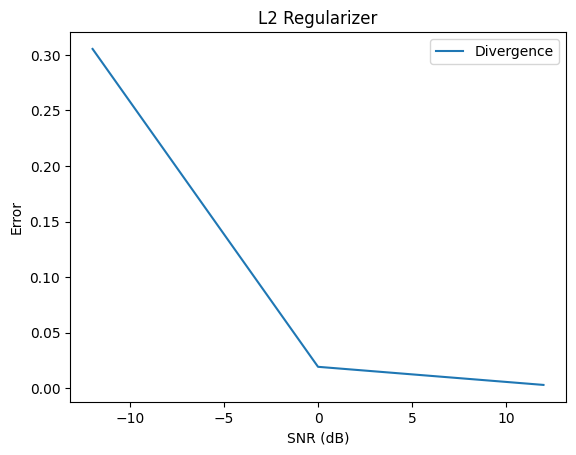

In [5]:
# plot error
import matplotlib.pyplot as plt
plt.plot(snr_db, divergence_error_l2, label="Divergence")
plt.xlabel("SNR (dB)")
plt.ylabel("Error")
plt.title("L2 Regularizer")
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


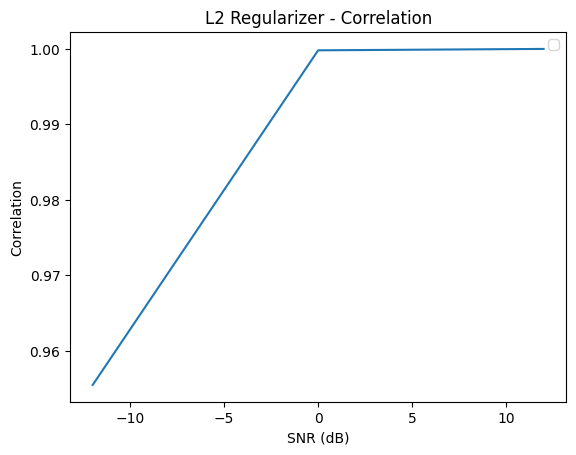

In [6]:
import matplotlib.pyplot as plt
plt.plot(snr_db, trend_fil.history["correlations"])
plt.xlabel("SNR (dB)")
plt.ylabel("Correlation")
plt.title("L2 Regularizer - Correlation")
plt.legend()

#### L1 regularizer

In [7]:

num_realizations = 50
snr_db = np.arange(-12, 12.5, 12)

shift_operator = sc.incidence_matrix(rank=1)

trend_fil.denoising_l1_regularizer(flow=flow, 
                                   shift_operator=shift_operator, 
                                   component="divergence",
                                   num_realizations=num_realizations, 
                                   snr_db=snr_db)

divergence_error_l1 = trend_fil.history["errors"]

SNR: 0.06309573444801933 dB - l1 error: 0.29024931237110685 - corr: 0.9595931095897384
SNR: 1.0 dB - l1 error: 0.019728449881666155 - corr: 0.9998015985445893
SNR: 15.848931924611133 dB - l1 error: 0.0032635518883125793 - corr: 0.9999945702165455


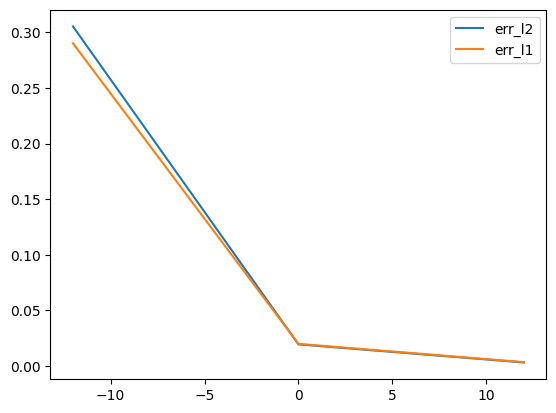

In [8]:
import matplotlib.pyplot as plt

plt.plot(snr_db, divergence_error_l2, label="err_l2")
plt.plot(snr_db, divergence_error_l1, label="err_l1")
plt.legend()

### Interpolation

In [5]:
ratio = np.arange(0.05, 1.05, 0.3)
num_realizations = 50

In [6]:
shift_operator = sc.incidence_matrix(rank=1)

trend_fil.interpolation_l1_regularizer(flow=flow, shift_operator=shift_operator, 
                                       component="divergence",
                                       ratio=ratio, 
                                       num_realizations=num_realizations)

Ratio: 0.05  - error: 0.9583487772899063 - corr: 0.268979734765798
Ratio: 0.35  - error: 0.6557232433313602 - corr: 0.7466615651782189
Ratio: 0.65  - error: 0.3390818419891462 - corr: 0.9368005810482244
Ratio: 0.95  - error: 0.010145815096452565 - corr: 0.9996754943399532
